In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sb
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

In [2]:
from core.utils.preprocessing import df_to_xy
#fix rnd seed
np.random.seed(7)

# Read and sanitize the data
# Read and sanitize the data
df = pd.read_csv("../data/t00/export/result__t00_prop.csv")
df_full = df.copy()
drop_cols = ["worker_id", "resp_worker_id", "prop_worker_id", "updated", "status", "job_id", "status", "timestamp", "rowid", "offer_dss", "offer", "offer_final", "completion_code", "prop_time_spent"]
df = df[[col for col in df.columns if col not in drop_cols]]
df = df.dropna()

In [3]:
# # Read and sanitize the data
# drop_cols = ["worker_id", "resp_worker_id", "prop_worker_id", "updated", "status", "job_id", "status", "timestamp", "rowid", "offer_dss", "offer", "offer_final", "completion_code", 'Unnamed: 0']
# TREATMENTS = ["t00", "t10", "t11"]
# df = None
# df_full = None
# for treatment in TREATMENTS:
#     df_tmp = pd.read_csv(f"../data/{treatment}/export/result__{treatment}_prop.csv")
#     if "offer_final" not in df_tmp.columns:
#         df_tmp["offer_final"] = df_tmp["offer"]
#     df_full_tmp = df_tmp.copy()
#     df_tmp = df_tmp[[col for col in df_tmp.columns if col not in drop_cols]]
#     df_tmp = df_tmp.dropna()
#     if df is None:
#         df = df_tmp
#         df_full = df_full_tmp
#     else:
#         cols = df.columns
#         for col in cols:
#             if col not in df_tmp:
#                 df_tmp[col] = None
#         cols_full = df_full.columns
#         for col in cols_full:
#             if col not in df_full_tmp.columns:
#                 df_full[col] = None
#         df = df.append(df_tmp[cols], ignore_index=True)
#         df_full = df_full.append(df_full_tmp[cols], ignore_index=True)


In [4]:



x, y = df_to_xy(df, fuse_risk=False)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 2/5, random_state = 0)

**Loss function**

In [5]:
@np.vectorize
def sigmoid1024(x):
    base = 1024.0**2
    return (base**x/(base**x + 1))

@np.vectorize
def loss(x):
    offset = 1
    x1 = (x + offset) / 8.0
    x2 = (x) / 20.0
    return (1 - sigmoid1024(x1) *  np.cos(x2/np.pi))

def gain(x):
    return 1 - loss(x)

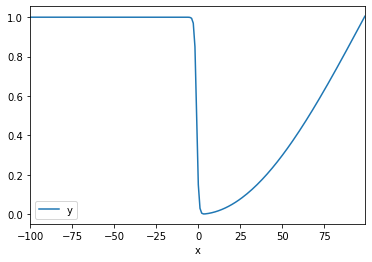

In [6]:
x = np.arange(-100, 100, 1)
y = loss(x)

out_df = pd.DataFrame({'x':x, 'y':y})
out_df.plot.line(x='x', y='y')

In [7]:
from core.utils.data_augmentation import DACombine

In [8]:
from core.models.deep import keras_hiddenless_model, keras_model, loss_tf, gain_tf, KerasModel
from keras import backend as K

Using TensorFlow backend.


**Metrics**

In [9]:
from core.models.metrics import gain_mean, avg_gain_ratio

**Model: No data Augmentation**

In [10]:
# model = KerasModel(loss=loss_tf, metrics=[gain_tf], batch_size=256, epochs=1000)
# da = DACombine()
# xTrain_a, yTrain_a = xTrain.astype(K.floatx()), yTrain.astype(K.floatx())
# split = int(xTrain.shape[1] * 0.75)
# #xTrain_a, yTrain_a = xTrain[:split], yTrain[:split]
# xVal, yVal = xTrain[split:], yTrain[split:]
# #xTrain_a, yTrain_a = da.fit_predict(xTrain, yTrain, size=1024, distance=10)
# history = model.fit(xTrain_a.astype(K.floatx()), yTrain_a.astype(K.floatx()),  validation_split=0.25, verbose=0)

# #print(history.history)

# loss_hist = pd.DataFrame(data={'loss': history.history['loss'], 'val_loss': history.history['val_loss']})
# loss_hist.plot()

# acc_hist = pd.DataFrame(data={'acc': history.history['gain_tf'], 'val_acc': history.history['val_gain_tf']})
# acc_hist.plot()

# yPred = model.predict(xTest, batch_size=128)

# out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
# #stl = model.score(xTest, yTest, verbose=0)

In [11]:
# yPred = model.predict(xTest)

# out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
# out_data.plot()

# yPred = model.predict(xTest)
# print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))
# print("gain_ratio: ", avg_gain_ratio(yTest.ravel(), yPred.ravel()))

**Model with data augmentation**

In [12]:
# #sci-kit like training
# model = KerasModel(loss=loss_tf, metrics=[gain_tf], batch_size=30, epochs=200)
# da = DACombine()
# xTrain_a, yTrain_a = xTrain, yTrain
# split = int(xTrain.shape[1] * 0.75)
# xTrain_a, yTrain_a = xTrain[:split], yTrain[:split]
# xVal, yVal = xTrain[split:], yTrain[split:]
# xTrain_a, yTrain_a = da.fit_predict(xTrain_a, yTrain_a, size=xTrain_a.shape[1]*16, distance=10, retarget=True, distribution=True, combine=True)
# history = model.fit(xTrain_a.astype('float'), yTrain_a.astype('float'),  validation_data=(xVal, yVal), verbose=0)
# loss_hist = pd.DataFrame(data={'loss': history.history['loss'], 'val_loss': history.history['val_loss']})
# loss_hist.plot()

# acc_hist = pd.DataFrame(data={'acc': history.history['gain_tf'], 'val_acc': history.history['val_gain_tf']})
# acc_hist.plot()

# yPred = model.predict(xTest, batch_size=128)

# out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
# #stl = model.score(xTest, yTest, verbose=0)

In [13]:
# yPred = model.predict(xTest)

# out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
# out_data.plot()

# yPred = model.predict(xTest)
# print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))
# print("gain_ratio: ", avg_gain_ratio(yTest.ravel(), yPred.ravel()))

** Model using _mse_ loss and data augmentation**

In [14]:
# #sci-kit like training
# model = KerasModel(loss='mse', metrics=[gain_tf], batch_size=60, epochs=200)
# da = DACombine()
# split = int(xTrain.shape[1] * 0.75)
# xTrain_a, yTrain_a = xTrain[:split], yTrain[:split]
# xVal, yVal = xTrain[split:], yTrain[split:]
# #xTrain_a, yTrain_a = da.fit_predict(xTrain_a, yTrain_a, size=xTrain_a.shape[1]*16, distance=10, retarget=True, distribution=True, combine=True)
# history = model.fit(xTrain_a.astype('float'), yTrain_a.astype('float'), validation_data=(xVal, yVal))
# loss_hist = pd.DataFrame(data={'loss': history.history['loss'], 'val_loss': history.history['val_loss']})
# loss_hist.plot()

# acc_hist = pd.DataFrame(data={'acc': history.history['gain_tf'], 'val_acc': history.history['val_gain_tf']})
# acc_hist.plot()

# yPred = model.predict(xTest, batch_size=128)

# out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
# #stl = model.score(xTest, yTest, verbose=0)

In [15]:
# yPred = model.predict(xTest)

# out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
# out_data.plot()

# yPred = model.predict(xTest)
# print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))
# print("gain_ratio: ", avg_gain_ratio(yTest.ravel(), yPred.ravel()))

In [16]:
from core.utils.data_augmentation import DASampling, DACombine

da = DACombine()
split = int(xTrain.shape[0] * 0.75)
xTrain_a, yTrain_a = xTrain[:split], yTrain[:split]
xVal, yVal = xTrain[split:], yTrain[split:]
#da2 = D
das = DASampling()
das
xTrain_a, yTrain_a = da.fit_predict(xTrain_a, yTrain_a, size=xTrain_a.shape[0]*64, distance=5, retarget=True, distribution=True, combine=True)
print(np.unique(yTrain_a))
xTrain_a, yTrain_a = das.generate_data(xTrain_a, yTrain_a, size=10000)

[ 10  25  30  40  45  50  55 100]


In [17]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-vvuz3st9
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-vvuz3st9
  Stored in directory: /tmp/pip-ephem-wheel-cache-ar4sjlj8/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [18]:
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras import regularizers
from keras import optimizers

from keras_contrib.layers.advanced_activations.srelu import SReLU
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(200, kernel_initializer='normal',input_dim = xTrain.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(275, kernel_initializer='normal',activation="relu"))
NN_model.add(Dense(100, kernel_initializer='normal',activation="relu",
            kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)
                  )
            )
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss=loss_tf, optimizer=optimizers.RMSprop(lr=0.1), metrics=[gain_tf])
NN_model.summary()


from core.models.deep import KerasModel

# NN_model = KerasModel(epochs=)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               12800     
_________________________________________________________________
dense_2 (Dense)              (None, 275)               55275     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               27600     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 95,776
Trainable params: 95,776
Non-trainable params: 0
_________________________________________________________________


In [19]:

# NN_model.fit(xTrain_a, to_categorical(yTrain_a, 201), epochs=200, shuffle=True, validation_split=0.2, batch_size=1024)
# NN_model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=0.00001), metrics=['acc'])
NN_model.fit(xTrain, yTrain, epochs=1000, validation_data=(xVal, yVal), shuffle=True, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Train on 61 samples, validate on 16 samples
Epoch 1/1000
61/61 [==============================] - 0s 3ms/step - loss: 3.6726 - gain_tf: 0.0000e+00 - val_loss: 979.7628 - val_gain_tf: 33.3052
Epoch 2/1000
61/61 [==============================] - 0s 78us/step - loss: 3586.5725 - gain_tf: 26.2670 - val_loss: 9.5475 - val_gain_tf: 0.0000e+00
Epoch 3/1000
61/61 [==============================] - 0s 76us/step - loss: 10.9998 - gain_tf: 0.0000e+00 - val_loss: 7.0438 - val_gain_tf: 0.0000e+00
Epoch 4/1000
61/61 [==============================] - 0s 71us/step - loss: 7.1125 - gain_tf: 0.0000e+00 - val_loss: 6.0306 - val_gain_tf: 0.0000e+00
Epoch 5/1000
61/61 [==============================] - 0s 59us/step - loss: 6.0243 - gain_tf: 0.0000e+00 - val_loss: 5.2600 - val_gain_tf: 0.0000e+00
Epoch 6/1000
61/61 [==============================] - 0s 72us/step - loss: 5.2534 - gain_tf: 0.0000e+00 - val_loss: 4.7474 - val_gain_tf: 0.0000e+00
Epoch 7/1000
61

Epoch 54/1000
61/61 [==============================] - 0s 74us/step - loss: 3.2362 - gain_tf: 10.7996 - val_loss: 3.2801 - val_gain_tf: 0.0000e+00
Epoch 55/1000
61/61 [==============================] - 0s 68us/step - loss: 3.1831 - gain_tf: 10.7910 - val_loss: 3.2620 - val_gain_tf: 0.0000e+00
Epoch 56/1000
61/61 [==============================] - 0s 59us/step - loss: 3.1640 - gain_tf: 10.7827 - val_loss: 3.3095 - val_gain_tf: 0.0000e+00
Epoch 57/1000
61/61 [==============================] - 0s 81us/step - loss: 3.2376 - gain_tf: 10.7726 - val_loss: 3.3433 - val_gain_tf: 0.0000e+00
Epoch 58/1000
61/61 [==============================] - 0s 96us/step - loss: 3.2437 - gain_tf: 10.7665 - val_loss: 3.3304 - val_gain_tf: 0.0000e+00
Epoch 59/1000
61/61 [==============================] - 0s 86us/step - loss: 3.2300 - gain_tf: 10.7585 - val_loss: 3.3197 - val_gain_tf: 0.0000e+00
Epoch 60/1000
61/61 [==============================] - 0s 106us/step - loss: 3.2186 - gain_tf: 10.7507 - val_loss: 3.3

Epoch 110/1000
61/61 [==============================] - 0s 75us/step - loss: 2.4138 - gain_tf: 10.4378 - val_loss: 2.5046 - val_gain_tf: 0.0000e+00
Epoch 111/1000
61/61 [==============================] - 0s 77us/step - loss: 2.3915 - gain_tf: 10.4324 - val_loss: 2.4630 - val_gain_tf: 0.0000e+00
Epoch 112/1000
61/61 [==============================] - 0s 86us/step - loss: 2.3498 - gain_tf: 10.4270 - val_loss: 2.4277 - val_gain_tf: 0.0000e+00
Epoch 113/1000
61/61 [==============================] - 0s 76us/step - loss: 2.3145 - gain_tf: 10.4215 - val_loss: 2.3860 - val_gain_tf: 0.0000e+00
Epoch 114/1000
61/61 [==============================] - 0s 78us/step - loss: 2.2727 - gain_tf: 10.4162 - val_loss: 2.3443 - val_gain_tf: 0.0000e+00
Epoch 115/1000
61/61 [==============================] - 0s 108us/step - loss: 2.2310 - gain_tf: 10.4108 - val_loss: 2.3105 - val_gain_tf: 0.0000e+00
Epoch 116/1000
61/61 [==============================] - 0s 73us/step - loss: 2.1971 - gain_tf: 10.4054 - val_lo

Epoch 166/1000
61/61 [==============================] - 0s 83us/step - loss: 1.5329 - gain_tf: 10.1884 - val_loss: 1.6492 - val_gain_tf: 0.0000e+00
Epoch 167/1000
61/61 [==============================] - 0s 89us/step - loss: 1.5353 - gain_tf: 10.1857 - val_loss: 1.6499 - val_gain_tf: 0.0000e+00
Epoch 168/1000
61/61 [==============================] - 0s 90us/step - loss: 1.5360 - gain_tf: 10.1832 - val_loss: 1.6480 - val_gain_tf: 0.0000e+00
Epoch 169/1000
61/61 [==============================] - 0s 75us/step - loss: 1.5341 - gain_tf: 10.1808 - val_loss: 1.6469 - val_gain_tf: 0.0000e+00
Epoch 170/1000
61/61 [==============================] - 0s 77us/step - loss: 1.5330 - gain_tf: 10.1784 - val_loss: 1.6491 - val_gain_tf: 0.0000e+00
Epoch 171/1000
61/61 [==============================] - 0s 100us/step - loss: 1.5351 - gain_tf: 10.1762 - val_loss: 1.6516 - val_gain_tf: 0.0000e+00
Epoch 172/1000
61/61 [==============================] - 0s 87us/step - loss: 1.5377 - gain_tf: 10.1741 - val_lo

Epoch 222/1000
61/61 [==============================] - 0s 60us/step - loss: 1.5503 - gain_tf: 10.1527 - val_loss: 1.6647 - val_gain_tf: 0.0000e+00
Epoch 223/1000
61/61 [==============================] - 0s 67us/step - loss: 1.5508 - gain_tf: 10.1527 - val_loss: 1.6719 - val_gain_tf: 0.0000e+00
Epoch 224/1000
61/61 [==============================] - 0s 74us/step - loss: 1.5580 - gain_tf: 10.1527 - val_loss: 1.6679 - val_gain_tf: 0.0000e+00
Epoch 225/1000
61/61 [==============================] - 0s 82us/step - loss: 1.5540 - gain_tf: 10.1527 - val_loss: 1.6663 - val_gain_tf: 0.0000e+00
Epoch 226/1000
61/61 [==============================] - 0s 104us/step - loss: 1.5524 - gain_tf: 10.1527 - val_loss: 1.6736 - val_gain_tf: 0.0000e+00
Epoch 227/1000
61/61 [==============================] - 0s 71us/step - loss: 1.5596 - gain_tf: 10.1527 - val_loss: 1.6789 - val_gain_tf: 0.0000e+00
Epoch 228/1000
61/61 [==============================] - 0s 99us/step - loss: 1.5649 - gain_tf: 10.1527 - val_lo

Epoch 278/1000
61/61 [==============================] - 0s 103us/step - loss: 1.5726 - gain_tf: 10.1465 - val_loss: 1.6826 - val_gain_tf: 0.0000e+00
Epoch 279/1000
61/61 [==============================] - 0s 86us/step - loss: 1.5687 - gain_tf: 10.1580 - val_loss: 1.6804 - val_gain_tf: 0.0000e+00
Epoch 280/1000
61/61 [==============================] - 0s 64us/step - loss: 1.5665 - gain_tf: 10.1475 - val_loss: 1.6796 - val_gain_tf: 0.0000e+00
Epoch 281/1000
61/61 [==============================] - 0s 64us/step - loss: 1.5656 - gain_tf: 10.1574 - val_loss: 1.6803 - val_gain_tf: 0.0000e+00
Epoch 282/1000
61/61 [==============================] - 0s 105us/step - loss: 1.5664 - gain_tf: 10.1479 - val_loss: 1.6812 - val_gain_tf: 0.0000e+00
Epoch 283/1000
61/61 [==============================] - 0s 105us/step - loss: 1.5673 - gain_tf: 10.1574 - val_loss: 1.6834 - val_gain_tf: 0.0000e+00
Epoch 284/1000
61/61 [==============================] - 0s 92us/step - loss: 1.5695 - gain_tf: 10.1477 - val_

Epoch 334/1000
61/61 [==============================] - 0s 91us/step - loss: 1.5731 - gain_tf: 10.1469 - val_loss: 1.6869 - val_gain_tf: 0.0000e+00
Epoch 335/1000
61/61 [==============================] - 0s 95us/step - loss: 1.5730 - gain_tf: 10.1582 - val_loss: 1.6869 - val_gain_tf: 0.0000e+00
Epoch 336/1000
61/61 [==============================] - 0s 97us/step - loss: 1.5730 - gain_tf: 10.1470 - val_loss: 1.6870 - val_gain_tf: 0.0000e+00
Epoch 337/1000
61/61 [==============================] - 0s 70us/step - loss: 1.5731 - gain_tf: 10.1581 - val_loss: 1.6871 - val_gain_tf: 0.0000e+00
Epoch 338/1000
61/61 [==============================] - 0s 69us/step - loss: 1.5732 - gain_tf: 10.1470 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 339/1000
61/61 [==============================] - 0s 84us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6874 - val_gain_tf: 0.0000e+00
Epoch 340/1000
61/61 [==============================] - 0s 78us/step - loss: 1.5734 - gain_tf: 10.1469 - val_los

Epoch 390/1000
61/61 [==============================] - 0s 65us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6872 - val_gain_tf: 0.0000e+00
Epoch 391/1000
61/61 [==============================] - 0s 88us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6872 - val_gain_tf: 0.0000e+00
Epoch 392/1000
61/61 [==============================] - 0s 94us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 393/1000
61/61 [==============================] - 0s 77us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 394/1000
61/61 [==============================] - 0s 76us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 395/1000
61/61 [==============================] - 0s 73us/step - loss: 1.5734 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 396/1000
61/61 [==============================] - 0s 94us/step - loss: 1.5734 - gain_tf: 10.1470 - val_los

Epoch 446/1000
61/61 [==============================] - 0s 84us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 447/1000
61/61 [==============================] - 0s 89us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 448/1000
61/61 [==============================] - 0s 85us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 449/1000
61/61 [==============================] - 0s 75us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 450/1000
61/61 [==============================] - 0s 65us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 451/1000
61/61 [==============================] - 0s 88us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 452/1000
61/61 [==============================] - 0s 70us/step - loss: 1.5733 - gain_tf: 10.1469 - val_los

Epoch 502/1000
61/61 [==============================] - 0s 67us/step - loss: 1.5733 - gain_tf: 10.1470 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 503/1000
61/61 [==============================] - 0s 68us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 504/1000
61/61 [==============================] - 0s 73us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 505/1000
61/61 [==============================] - 0s 94us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 506/1000
61/61 [==============================] - 0s 94us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 507/1000
61/61 [==============================] - 0s 84us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 508/1000
61/61 [==============================] - 0s 85us/step - loss: 1.5733 - gain_tf: 10.1469 - val_los

Epoch 558/1000
61/61 [==============================] - 0s 72us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 559/1000
61/61 [==============================] - 0s 90us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 560/1000
61/61 [==============================] - 0s 71us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 561/1000
61/61 [==============================] - 0s 63us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 562/1000
61/61 [==============================] - 0s 78us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 563/1000
61/61 [==============================] - 0s 77us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 564/1000
61/61 [==============================] - 0s 82us/step - loss: 1.5733 - gain_tf: 10.1469 - val_los

Epoch 614/1000
61/61 [==============================] - 0s 79us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 615/1000
61/61 [==============================] - 0s 63us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 616/1000
61/61 [==============================] - 0s 82us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 617/1000
61/61 [==============================] - 0s 78us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 618/1000
61/61 [==============================] - 0s 64us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 619/1000
61/61 [==============================] - 0s 80us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 620/1000
61/61 [==============================] - 0s 78us/step - loss: 1.5733 - gain_tf: 10.1469 - val_los

Epoch 670/1000
61/61 [==============================] - 0s 93us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 671/1000
61/61 [==============================] - 0s 89us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 672/1000
61/61 [==============================] - 0s 71us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 673/1000
61/61 [==============================] - 0s 65us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 674/1000
61/61 [==============================] - 0s 83us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 675/1000
61/61 [==============================] - 0s 91us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 676/1000
61/61 [==============================] - 0s 80us/step - loss: 1.5733 - gain_tf: 10.1469 - val_los

Epoch 726/1000
61/61 [==============================] - 0s 75us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 727/1000
61/61 [==============================] - 0s 85us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 728/1000
61/61 [==============================] - 0s 74us/step - loss: 1.5733 - gain_tf: 10.1470 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 729/1000
61/61 [==============================] - 0s 80us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 730/1000
61/61 [==============================] - 0s 62us/step - loss: 1.5733 - gain_tf: 10.1470 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 731/1000
61/61 [==============================] - 0s 89us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 732/1000
61/61 [==============================] - 0s 70us/step - loss: 1.5733 - gain_tf: 10.1469 - val_los

Epoch 782/1000
61/61 [==============================] - 0s 74us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 783/1000
61/61 [==============================] - 0s 74us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 784/1000
61/61 [==============================] - 0s 76us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 785/1000
61/61 [==============================] - 0s 95us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 786/1000
61/61 [==============================] - 0s 80us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 787/1000
61/61 [==============================] - 0s 83us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 788/1000
61/61 [==============================] - 0s 102us/step - loss: 1.5733 - gain_tf: 10.1469 - val_lo

Epoch 838/1000
61/61 [==============================] - 0s 89us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 839/1000
61/61 [==============================] - 0s 68us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 840/1000
61/61 [==============================] - 0s 68us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 841/1000
61/61 [==============================] - 0s 69us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 842/1000
61/61 [==============================] - 0s 67us/step - loss: 1.5733 - gain_tf: 10.1470 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 843/1000
61/61 [==============================] - 0s 88us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 844/1000
61/61 [==============================] - 0s 76us/step - loss: 1.5733 - gain_tf: 10.1470 - val_los

Epoch 894/1000
61/61 [==============================] - 0s 78us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 895/1000
61/61 [==============================] - 0s 77us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 896/1000
61/61 [==============================] - 0s 67us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 897/1000
61/61 [==============================] - 0s 65us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 898/1000
61/61 [==============================] - 0s 67us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 899/1000
61/61 [==============================] - 0s 68us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 900/1000
61/61 [==============================] - 0s 74us/step - loss: 1.5733 - gain_tf: 10.1469 - val_los

Epoch 950/1000
61/61 [==============================] - 0s 79us/step - loss: 1.5733 - gain_tf: 10.1470 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 951/1000
61/61 [==============================] - 0s 74us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 952/1000
61/61 [==============================] - 0s 89us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 953/1000
61/61 [==============================] - 0s 109us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 954/1000
61/61 [==============================] - 0s 76us/step - loss: 1.5733 - gain_tf: 10.1469 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 955/1000
61/61 [==============================] - 0s 63us/step - loss: 1.5733 - gain_tf: 10.1582 - val_loss: 1.6873 - val_gain_tf: 0.0000e+00
Epoch 956/1000
61/61 [==============================] - 0s 81us/step - loss: 1.5733 - gain_tf: 10.1469 - val_lo

In [20]:
yPred = NN_model.predict(xTrain)

In [21]:
avg_gain_ratio(yTrain, yPred)

0.10629853321829162

In [22]:
yPred = NN_model.predict(xTest)
avg_gain_ratio(yTest, yPred)
# avg_gain_ratio(yTest, np.ones_like(yTest)*50)

0.1325758841548315

**CMP Model**

gain_mean:  12.571428571428571
gain_ratio:  0.1325758841548315


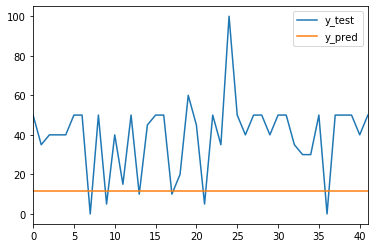

In [23]:
yPred = NN_model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = NN_model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))
print("gain_ratio: ", avg_gain_ratio(yTest.ravel(), yPred.ravel()))